In [185]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn


In [203]:
data = pd.read_csv("matala2_cosmetics_2019-Nov.csv", low_memory=False)


In [204]:
data = data.drop(columns=['category_id', 'category_code','brand'])


In [205]:
data['event_time']= pd.to_datetime(data['event_time'])



In [207]:
data = data.sort_values(['user_id', 'event_time'])
data.tail(10)


,event_time,event_type,product_id,price,user_id,user_session
4635543,2019-11-30 23:49:28+00:00,view,5809910,5.24,579966992,868f2e3c-f79e-41bc-a903-267fb195a6af
4635578,2019-11-30 23:50:13+00:00,view,5881428,14.29,579967088,670cb8b4-bef1-4ec7-bfe8-7c8317967c74
4635655,2019-11-30 23:53:24+00:00,view,5873630,3.97,579968012,547ad51a-cdf2-4a0a-b819-8061c012bcee
4635713,2019-11-30 23:55:43+00:00,view,5892179,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058
4635724,2019-11-30 23:56:00+00:00,view,5886282,21.59,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058
4635733,2019-11-30 23:56:14+00:00,view,5892179,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058
4635736,2019-11-30 23:56:17+00:00,view,5900651,19.52,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058
4635737,2019-11-30 23:56:21+00:00,view,5892179,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058
4635752,2019-11-30 23:56:46+00:00,view,5790563,7.14,579968937,878af093-7570-48ae-966c-d50ce61e390c
4635836,2019-11-30 23:59:58+00:00,view,5880201,3.76,579969854,e9fa2c3e-8c9e-448c-880a-21ca57c18b3b


# 1

In [208]:
data['duration_to_next_event'] = data.groupby('user_session')['event_time'].transform(lambda x: x.diff().shift(-1).dt.total_seconds())
data.loc[data.groupby('user_session')['event_time'].idxmax(), 'duration_to_next_event'] = 0

In [209]:
data.tail(10)


,event_time,event_type,product_id,price,user_id,user_session,duration_to_next_event
4635543,2019-11-30 23:49:28+00:00,view,5809910,5.24,579966992,868f2e3c-f79e-41bc-a903-267fb195a6af,0.0
4635578,2019-11-30 23:50:13+00:00,view,5881428,14.29,579967088,670cb8b4-bef1-4ec7-bfe8-7c8317967c74,0.0
4635655,2019-11-30 23:53:24+00:00,view,5873630,3.97,579968012,547ad51a-cdf2-4a0a-b819-8061c012bcee,0.0
4635713,2019-11-30 23:55:43+00:00,view,5892179,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,17.0
4635724,2019-11-30 23:56:00+00:00,view,5886282,21.59,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,14.0
4635733,2019-11-30 23:56:14+00:00,view,5892179,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,3.0
4635736,2019-11-30 23:56:17+00:00,view,5900651,19.52,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,4.0
4635737,2019-11-30 23:56:21+00:00,view,5892179,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0.0
4635752,2019-11-30 23:56:46+00:00,view,5790563,7.14,579968937,878af093-7570-48ae-966c-d50ce61e390c,0.0
4635836,2019-11-30 23:59:58+00:00,view,5880201,3.76,579969854,e9fa2c3e-8c9e-448c-880a-21ca57c18b3b,0.0


# 2

In [210]:

data['days_since_last_visit'] = data.groupby('user_id')['event_time'].diff().dt.days
data['new_funnel'] = (data['days_since_last_visit'] > 5) | (data['days_since_last_visit'].isnull())
data['funnel_number'] = data.groupby('user_id')['new_funnel'].cumsum()

In [220]:
data[data.user_id == 504468592][['event_time','user_session','duration_to_next_event','funnel_number','index_in_funnel']]#.sort_values(by = 'user_session' ,ascending=False)

,event_time,user_session,duration_to_next_event,funnel_number,index_in_funnel
63825,2019-11-01 13:59:07+00:00,35aab71b-451c-453e-95ed-31f222754bed,1.0,1,1
63828,2019-11-01 13:59:08+00:00,35aab71b-451c-453e-95ed-31f222754bed,3.0,1,1
63833,2019-11-01 13:59:11+00:00,35aab71b-451c-453e-95ed-31f222754bed,0.0,1,1
63834,2019-11-01 13:59:11+00:00,35aab71b-451c-453e-95ed-31f222754bed,3.0,1,1
63839,2019-11-01 13:59:14+00:00,35aab71b-451c-453e-95ed-31f222754bed,4.0,1,1
...,...,...,...,...,...
2848521,2019-11-21 14:37:26+00:00,1d76a639-aecc-4c63-b885-aab3677952c7,66.0,2,11
2848779,2019-11-21 14:38:32+00:00,1d76a639-aecc-4c63-b885-aab3677952c7,13.0,2,11
2848813,2019-11-21 14:38:45+00:00,1d76a639-aecc-4c63-b885-aab3677952c7,89.0,2,11
2849091,2019-11-21 14:40:14+00:00,1d76a639-aecc-4c63-b885-aab3677952c7,0.0,2,11


# 3

In [211]:
data['index_in_funnel'] = data.groupby(['user_id', 'funnel_number'])['user_session'].transform(lambda x: x.factorize()[0] + 1)


# 4

In [212]:
data['price'] = data['price'].replace('[^\d.]+', '', regex=True).astype(float)


# 5

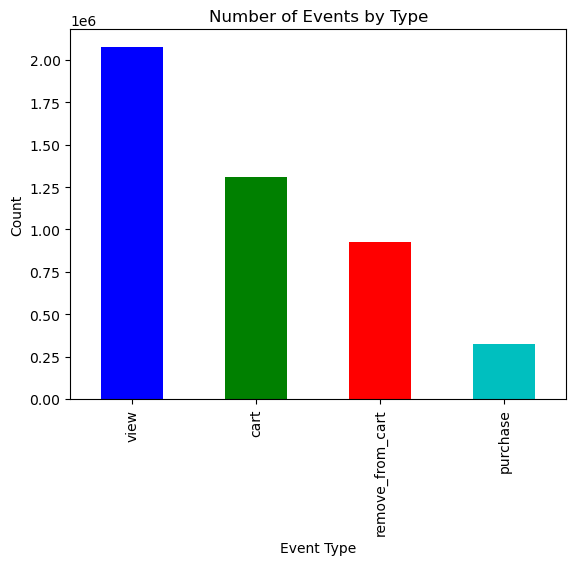

In [213]:
# assuming you have a DataFrame named df with a column named 'event_type'
event_counts = data['event_type'].value_counts()

# create a bar chart with different colors for each event type
colors = ['b', 'g', 'r', 'c']
event_counts.plot(kind='bar', color=colors)

# add labels and title
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.title('Number of Events by Type')


# show the chart
plt.show()

# 6

In [215]:
session_data = data[['user_id', 'user_session' , 'funnel_number', 'index_in_funnel']].drop_duplicates(subset = 'user_session')


In [216]:
session_counts = data.groupby('user_session').size().reset_index(name='num_actions')
session_duration = data.groupby('user_session')['event_time'].agg(lambda x: x.max() - x.min()).reset_index(name='session_duration')


In [217]:
viewed_products = data[data['event_type'] == 'view'].groupby('user_session')['product_id'].apply(list).reset_index(name='list_of_viewed')
cart_products = data[data['event_type'] == 'cart'].groupby('user_session')['product_id'].apply(list).reset_index(name='list_of_added_to_cart')
purchased_products = data[data['event_type'] == 'purchase'].groupby('user_session')['product_id'].apply(list).reset_index(name='list_of_purchased')

session_data = session_counts.merge(session_duration, on='user_session', how='outer').merge(viewed_products, on='user_session', how='outer').merge(cart_products, on='user_session', how='outer').merge(purchased_products, on='user_session', how='outer').merge(session_data, on='user_session', how='outer')


In [219]:
session_data

,user_session,num_actions,session_duration,list_of_viewed,list_of_added_to_cart,list_of_purchased,user_id,funnel_number,index_in_funnel
0,00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,1.0,0 days 00:00:00,[5829298],NaN,NaN,556321594,1,1
1,00001bc6-1e04-4861-be5d-1bc73929c21a,1.0,0 days 00:00:00,[5771614],NaN,NaN,570103701,1,2
2,00001e77-5db8-4e96-ab7a-022ed3caf8b3,1.0,0 days 00:00:00,[5568472],NaN,NaN,571677620,1,1
3,00004c7d-9507-474e-a559-0fdaccaaa390,1.0,0 days 00:00:00,[5864850],NaN,NaN,504468592,2,6
4,0000597b-de39-4a77-9fe5-02c8792ca14e,3.0,0 days 00:02:31,"[5861620, 5861619, 5861591]",NaN,NaN,571211128,1,2
...,...,...,...,...,...,...,...,...,...
942018,ffff5954-5b7f-4dd8-9fa1-078ae32e684f,2.0,0 days 00:01:14,"[5588154, 5676246]",NaN,NaN,577542926,1,1
942019,ffff8044-2a22-4846-8a72-999e870abbe9,1.0,0 days 00:00:00,[5847328],NaN,NaN,560528468,1,4
942020,ffffbe0a-d2c2-47c7-afab-680bfdfda50d,1.0,0 days 00:00:00,[5528034],NaN,NaN,566764549,1,1
942021,ffffd77a-a036-47bf-827c-a0758ed05d9f,1.0,0 days 00:00:00,[5727753],NaN,NaN,579330435,1,1
